# First Model

Liner regression with model

$y = WX$

Producing (200/200)

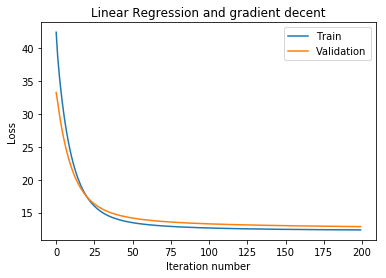

In [3]:
import numpy as np
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# define objective function
def model_function(x):
    return np.dot(x, omega[:13])[0]


# define loss function
def loss_function(given_x, given_y):
    loss = 0
    for cur_x, cur_y in zip(given_x, given_y):
        cur_x = cur_x.toarray()
        loss = loss + (model_function(cur_x) - cur_y) ** 2

    loss = loss / (2 * given_y.size)
    return loss


# load data set
X, y = load_svmlight_file("housing_scale")

# split data set
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.33, random_state=42)

# parameters initialize - zeros
omega = np.zeros(13)

# define learning rate
eta = 0.25

# define iteration number
iteration_num = 200

# gradient decent
train_loss = []
validation_loss = []
for i in range(iteration_num):
    # print current iteration number
    print("\rProducing (" + str(i + 1) + "/" + str(iteration_num) + ")", end="")

    # gradient = -X^T * y + X^T * x * w
    #          = - A * y + B * w
    #          = - A * y + A * X * w

    # calculate A
    A = X_train.toarray().T

    # calculate B
    B = np.dot(A, X_train.toarray())

    # calculate gradient
    # gradient = np.dot(B, theta) - np.dot(A, y_train)
    gradient = np.subtract(np.dot(B, omega), np.dot(A, y_train))

    # gradient divided by number of samples
    for j in range(len(gradient)):
        gradient[j] = gradient[j] / y_train.size

    # decent function, update parameters
    omega = omega - eta * gradient

    # calculate loss
    train_loss.append(loss_function(X_train, y_train))
    validation_loss.append(loss_function(X_validation, y_validation))

# plot loss changes with iteration
# yellow line for validation data loss
plt.plot(range(iteration_num), train_loss, label="Train")
plt.plot(range(iteration_num), validation_loss, label="Validation")
plt.legend()

plt.xlabel("Iteration number")
plt.ylabel("Loss")
plt.title("Linear Regression and gradient decent")
plt.show()


# Second Model

Liner regression with model

$y = WX+b$

Producing (200/200)

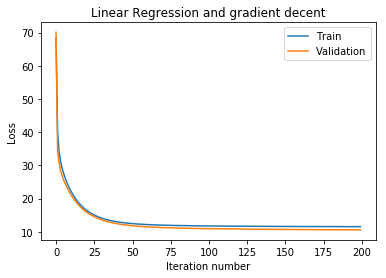

In [15]:
import numpy as np
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# define objective function
def model_function(x):
    return np.dot(x, omega[:13])[0] + omega[13]


# define loss function
def loss_function(given_x, given_y):
    loss = 0
    for cur_x, cur_y in zip(given_x, given_y):
        cur_x = cur_x.toarray()
        loss = loss + (model_function(cur_x) - cur_y) ** 2

    loss = loss / (2 * given_y.size)
    return loss


# load data set
X, y = load_svmlight_file("housing_scale")

# split data set
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.33, random_state=42)

# parameters initialize - zeros
omega = np.random.normal(3, 0.1, 14)

# define learning rate
eta = 0.25

# define iteration number
iteration_num = 200

# gradient decent
train_loss = []
validation_loss = []
for i in range(iteration_num):
    # print current iteration number
    print("\rProducing (" + str(i + 1) + "/" + str(iteration_num) + ")", end="")

    # calculate gradient
    gradient = np.zeros(14)
    for curr_x, curr_y in zip(X_train, y_train):
        curr_x = curr_x.toarray()
        # calculate Partial derivatives
        for j in range(13):
            gradient[j] = gradient[j] + (model_function(curr_x) - curr_y) * curr_x[0][j]

        gradient[13] = gradient[13] + (model_function(curr_x) - curr_y)

    # average gradient of samples
    for j in range(len(gradient)):
        gradient[j] = gradient[j] / y_train.size

    # update parameters
    omega = omega - eta * gradient

    # calculate loss
    train_loss.append(loss_function(X_train, y_train))
    validation_loss.append(loss_function(X_validation, y_validation))

# plot loss changes with iteration
# yellow line for validation data loss
plt.plot(range(iteration_num), train_loss, label="Train")
plt.plot(range(iteration_num), validation_loss, label="Validation")
plt.legend()

plt.xlabel("Iteration number")
plt.ylabel("Loss")
plt.title("Linear Regression and gradient decent")
plt.show()
